In [2]:
%load_ext autoreload
%autoreload 2

In [19]:
from interval_model import *

fname = "..\\..\\data\\VRPTW\\solomon_25\\R101.json"

tlim = 10

cvrptw_prob = CVRPTWProblem()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
# model, data_model = build_model(cvrptw_prob)
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')

params = CpoParameters()
# params.SearchType = 'Restart'
params.LogPeriod = 100000
params.LogVerbosity = 'Terse'
model.set_parameters(params=params)

best_known_solution: 828.94
num_cust= 25
num_vehicles= 25
n= 75
len(vrp.distance_matrix)=  75
vrp.distance_matrix[0]=  [0, 325, 145, 322, 322, 248, 210, 315, 178, 155, 264, 166, 264, 468, 453, 424, 407, 228, 282, 164, 292, 392, 461, 277, 376, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152]
vrp.distance_matrix[1]=  [325, 0, 344, 202, 238, 164, 362, 360, 474, 432, 502, 234, 94, 211, 130, 251, 326, 274, 474, 490, 104, 122, 233, 349, 301, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
vrp.distance_matrix[2]=  [145, 344, 0, 250, 427, 335, 353, 450, 150, 291, 403, 111, 320, 531, 471, 514, 522, 

{'LogPeriod': 100000, 'LogVerbosity': 'Terse'}

In [20]:
solution = model.solve(TimeLimit=tlim)

C:/Users/micha/OneDrive - České vysoké učení technické v Praze/Dokumenty/PycharmProjects/optimizin/General-Optimization-Solver/src/vrp/interval_model.py:168(stream:2292:1): Warning: Constraint 'span': master interval variable 'T0' is optional but spanned interval 'V25_0' is present.
                                                                                                                                                                                              span(T0, [V0_0, V1_0, V2_0, V3_0, V4_0, V5_0, V6_0, V7_0, V8_0, V9_0, V10_0, V11_0, V12_0, V13_0, V14_0, V15_0, V16_0, V17_0, V18_0, V19_0, V20_0, V21_0, V22_0, V23_0, V24_0, V25_0, V26_0, V27_0, V28_0, V29_0, V30_0, V31_0, V32_0, V33_0, V34_0, V35_0, V36_0, V37_0, V38_0, V39_0, V40_0, V41_0, V42_0, V43_0, V44_0, V45_0, V46_0, V47_0, V48_0, V49_0, V50_0, V51_0, V52_0, V53_0, V54_0, V55_0, V56_0, V57_0, V58_0, V59_0, V60_0, V61_0, V62_0, V63_0, V64_0, V65_0, V66_0, V67_0, V68_0, V69_0, V70_0, V71_0, V72_0, V73_0, V74_0])


In [8]:
import docplex

solutions = []

for key, sol in solution.solution.var_solutions_dict.items():
    match type(sol):
        case docplex.cp.solution.CpoIntervalVarSolution:
            if sol.presence != False and sol.size != 0:
                print(sol)

        case docplex.cp.solution.CpoSequenceVarSolution:
            if sol.lvars != []:
                print(sol)
                if len(sol.lvars) > 2:
                    solutions.append(sol)
        case _:
            print()
            print()
            print(type(sol))
            print(key, sol)
            print()
            print()


V19_14: (start=100, end=1000, size=900, length=900)
V19_14: (start=100, end=1000, size=900, length=900)
V20_14: (start=4762, end=5662, size=900, length=900)
V20_14: (start=4762, end=5662, size=900, length=900)
V21_14: (start=1028, end=1928, size=900, length=900)
V21_14: (start=1028, end=1928, size=900, length=900)
V22_14: (start=3826, end=4726, size=900, length=900)
V22_14: (start=3826, end=4726, size=900, length=900)
V23_14: (start=1964, end=2864, size=900, length=900)
V23_14: (start=1964, end=2864, size=900, length=900)
V24_14: (start=2884, end=3784, size=900, length=900)
V24_14: (start=2884, end=3784, size=900, length=900)
V0_16: (start=5723, end=6623, size=900, length=900)
V0_16: (start=5723, end=6623, size=900, length=900)
V1_16: (start=4803, end=5703, size=900, length=900)
V1_16: (start=4803, end=5703, size=900, length=900)
V2_16: (start=6659, end=7559, size=900, length=900)
V2_16: (start=6659, end=7559, size=900, length=900)
V3_16: (start=3867, end=4767, size=900, length=900)
V3

In [1]:
# convert sequence to path
paths = []
for solution in solutions:
    path = []
    for i in range(len(solution.lvars)):
        prdel = int(solution.lvars[i].get_name()[1:].split('_')[0])+1
        if prdel > cvrptw_prob.nb_customers:
            prdel = 0
        path.append(prdel)
    print(path)
    paths.append(path)

paths = {'paths': paths}

visualize_path(paths, None, cvrptw_prob)


NameError: name 'solutions' is not defined

In [ ]:
ref_paths = instance['our_best_solution']
visualize_path(ref_paths, None, cvrptw_prob)

best_known_solution: 191.3
num_cust= 25
num_vehicles= 25
n= 75
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 1975 variables, 200 constraints
 ! TimeLimit            = 10
 ! LogPeriod            = 100000
 ! LogVerbosity         = Terse
 ! Initial process time : 0.03s (0.03s extraction + 0.00s propagation)
 !  . Log search space  : 430.1 (before), 430.1 (after)
 !  . Memory usage      : 9.2 MB (before), 9.2 MB (after)
 ! Using parallel search with 12 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0       1975                 -
 + New bound is -2250
 ! Using iterative diving.
 *          1853     2157  0.12s        1      (gap is 221.4%)
 *          1803     2249  0.12s        1      (gap is 224.8%)
 *          1796     2428  0.12s        1      (gap is 225.3%)
 *          1700     2845  0.12s        1

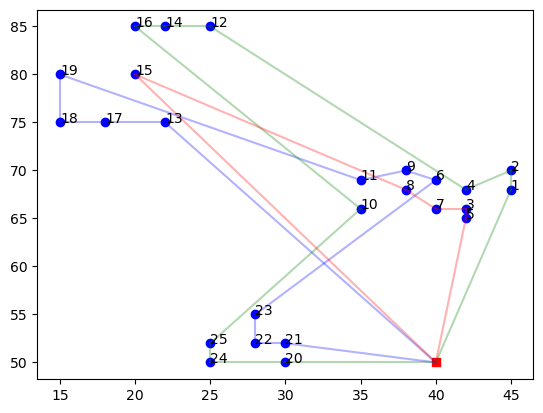

Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 13 is 30
Node 13 arrive 30 early 30 late 92 start 30
Distance from 13 to 17 is 4
Node 17 arrive 124 early 99 late 148 start 124
Distance from 17 to 18 is 3
Node 18 arrive 217 early 179 late 254 start 217
Distance from 18 to 19 is 5
Node 19 arrive 312 early 278 late 345 start 312
Distance from 19 to 11 is 22
Node 11 arrive 424 early 448 late 505 start 448
Distance from 11 to 9 is 3
Node 9 arrive 541 early 534 late 605 start 541
Distance from 9 to 6 is 2
Node 6 arrive 633 early 621 late 702 start 633
Distance from 6 to 23 is 18
Node 23 arrive 741 early 732 late 777 start 741
Distance from 23 to 22 is 3
Node 22 arrive 834 early 812 late 883 start 834
Distance from 22 to 21 is 2
Node 21 arrive 926 early 914 late 965 start 926
Distance from 21 to 0 is 10
Route len 1026
Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 20 is 10
Node 20 arrive 10 early 10 late 73 start 10
Distance from 20 to 24 is 5
Node 24 arrive 105 early 65 

In [7]:
from interval_model import *

fname = "..\\..\\data\\VRPTW\\solomon_25\\C101.json"

tlim = 10

cvrptw_prob = CVRPTWProblem()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
# model, data_model = build_model(cvrptw_prob)
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')

params = CpoParameters()
# params.SearchType = 'Restart'
params.LogPeriod = 100000
params.LogVerbosity = 'Terse'
model.set_parameters(params=params)

solution = model.solve(TimeLimit=tlim)

import docplex

solutions = []

for key, sol in solution.solution.var_solutions_dict.items():
    match type(sol):
        case docplex.cp.solution.CpoIntervalVarSolution:
            pass
            # if sol.presence != False and sol.size != 0:
            #     print(sol)

        case docplex.cp.solution.CpoSequenceVarSolution:
            if sol.lvars != []:
                # print(sol)
                if len(sol.lvars) > 2:
                    solutions.append(sol)
                    print("found path", key)
        case _:
            print()
            print()
            print(type(sol))
            print(key, sol)
            print()
            print()

# convert sequence to path
paths = []
for sol in solutions:
    path = []
    for i in range(len(sol.lvars)):
        prdel = int(sol.lvars[i].get_name()[1:].split('_')[0])+1
        if prdel > cvrptw_prob.nb_customers:
            prdel = 0
        path.append(prdel)
    if path in paths:
        continue
    # path.reverse()
    print(path)
    paths.append(path)

paths = {'paths': paths}

visualize_path(paths, None, cvrptw_prob)
validate_path(paths, cvrptw_prob)

191.3
[[0, 20, 24, 0, 23, 22, 21, 0], [0, 5, 3, 7, 8, 10, 11, 9, 6, 4, 2, 1, 0], [0, 13, 17, 18, 19, 15, 16, 14, 12, 0]]


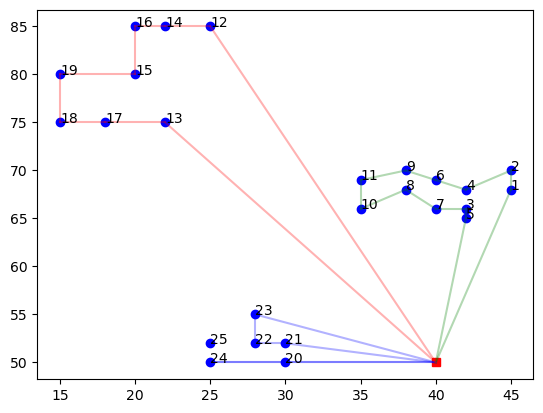

In [5]:
# instance['our_best_solution']['paths'][2][5] = 25
# validate_path(instance['our_best_solution'], cvrptw_prob)
ref_paths = instance['our_best_solution']
print(ref_paths['total_distance'])
print(ref_paths['paths'])
visualize_path(ref_paths, None, cvrptw_prob)

In [15]:
validate_path(paths, cvrptw_prob)


Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 13 is 308
Node 13 arrive 308 early 300 late 920 start 308
Distance from 13 to 17 is 40
Node 17 arrive 1248 early 990 late 1480 start 1248
Distance from 17 to 18 is 30
Node 18 arrive 2178 early 1790 late 2540 start 2178
Distance from 18 to 19 is 50
Node 19 arrive 3128 early 2780 late 3450 start 3128
Distance from 19 to 15 is 50
Node 15 arrive 4078 early 3840 late 4290 start 4078
Distance from 15 to 16 is 50
Node 16 arrive 5028 early 4750 late 5280 start 5028
Distance from 16 to 14 is 20
Node 14 arrive 5948 early 5670 late 6200 start 5948
Distance from 14 to 23 is 305
Node 23 arrive 7153 early 7320 late 7770 start 7320
Distance from 23 to 22 is 30
Node 22 arrive 8250 early 8120 late 8830 start 8250
Distance from 22 to 0 is 121
Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 20 is 100
Node 20 arrive 100 early 100 late 730 start 100
Distance from 20 to 24 is 50
Node 24 arrive 1050 early 650 late 1440 start 1050
Distance fr

AssertionError: Total distance 235.5 does not match objective value 232.0

In [35]:
print(solution.solution['V7'])
print(solution.solution['TW7'])
print(solution.solution['V7_2'])
print(solution.solution['V11_2'])
print(solution.solution['V12_2'])
print(solution.solution['V7_2'])



IntervalVarValue(start=2028, end=2928, size=900)
IntervalVarValue(start=2550, end=4140, size=1590)
IntervalVarValue(start=2028, end=2928, size=900)
()
()
IntervalVarValue(start=2028, end=2928, size=900)


In [8]:
num_vehicles = num_cust = 25
n = num_cust + num_vehicles * 2

for vehicle in range(num_vehicles):
    i = num_cust + num_vehicles + vehicle
    idx = f'V{i}_{vehicle}'
    res = solution.solution[idx]
    print(idx, res)
    idx = f'R{vehicle}'
    res = solution.solution[idx]
    print(f'R{vehicle}', len(res), len(res)*90)


V50_0 IntervalVarValue(start=0, end=0, size=0)
R0 2 180
V51_1 IntervalVarValue(start=0, end=0, size=0)
R1 2 180
V52_2 IntervalVarValue(start=0, end=0, size=0)
R2 2 180
V53_3 IntervalVarValue(start=0, end=0, size=0)
R3 2 180
V54_4 IntervalVarValue(start=0, end=0, size=0)
R4 2 180
V55_5 IntervalVarValue(start=0, end=0, size=0)
R5 2 180
V56_6 IntervalVarValue(start=0, end=0, size=0)
R6 2 180
V57_7 IntervalVarValue(start=0, end=0, size=0)
R7 2 180
V58_8 IntervalVarValue(start=0, end=0, size=0)
R8 2 180
V59_9 IntervalVarValue(start=0, end=0, size=0)
R9 2 180
V60_10 IntervalVarValue(start=1017, end=1017, size=0)
R10 11 990
V61_11 IntervalVarValue(start=0, end=0, size=0)
R11 2 180
V62_12 IntervalVarValue(start=0, end=0, size=0)
R12 2 180
V63_13 IntervalVarValue(start=0, end=0, size=0)
R13 2 180
V64_14 IntervalVarValue(start=0, end=0, size=0)
R14 2 180
V65_15 IntervalVarValue(start=0, end=0, size=0)
R15 2 180
V66_16 IntervalVarValue(start=0, end=0, size=0)
R16 2 180
V67_17 IntervalVarValue(sta

In [19]:
temp = solution.solution['R21']


In [8]:
paths.append(path.reverse())
